## Load the packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import researchpy as rp
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
from collections import Counter
import itertools

In [2]:
#Display full contents of a dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

## Import the Dataset

In [3]:
home_page=pd.read_csv('C:/Users/seagu/OneDrive/Paris/ds_take_home_challenges/Funnel Analysis/Funnel/home_page_table.csv')
home_page.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [4]:
search_page_table=pd.read_csv('C:/Users/seagu/OneDrive/Paris/ds_take_home_challenges/Funnel Analysis/Funnel/search_page_table.csv')
search_page_table.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [5]:
payment_page_table=pd.read_csv('C:/Users/seagu/OneDrive/Paris/ds_take_home_challenges/Funnel Analysis/Funnel/payment_page_table.csv')
payment_page_table.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [6]:
payment_confirmation_table=pd.read_csv('C:/Users/seagu/OneDrive/Paris/ds_take_home_challenges/Funnel Analysis/Funnel/payment_confirmation_table.csv')
payment_confirmation_table.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [7]:
user_table=pd.read_csv('C:/Users/seagu/OneDrive/Paris/ds_take_home_challenges/Funnel Analysis/Funnel/user_table.csv')
user_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  90400 non-null  int64 
 1   date     90400 non-null  object
 2   device   90400 non-null  object
 3   sex      90400 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


## Data Processing

In [8]:
data = pd.merge(left=user_table, right=home_page, how='left', on='user_id')
data = pd.merge(left=data, right=search_page_table, how='left', on='user_id', suffixes=('_home', '_search'))
data = pd.merge(left=data, right=payment_page_table, how='left', on='user_id')
data = pd.merge(left=data, right=payment_confirmation_table, how='left', on='user_id', suffixes=('_payment', '_confirmation'))
data.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            90400 non-null  int64         
 1   date               90400 non-null  datetime64[ns]
 2   device             90400 non-null  object        
 3   sex                90400 non-null  object        
 4   page_home          90400 non-null  object        
 5   page_search        45200 non-null  object        
 6   page_payment       6030 non-null   object        
 7   page_confirmation  452 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 6.2+ MB


In [9]:
data['date']=pd.to_datetime(data['date'])

In [11]:
#check missing value
null_df = data.isnull().sum() / data.shape[0] * 100
null_df

user_id              0.000000 
date                 0.000000 
device               0.000000 
sex                  0.000000 
page_home            0.000000 
page_search          50.000000
page_payment         93.329646
page_confirmation    99.500000
dtype: float64

In [21]:
data['page_home'] = data['page_home'].replace({'home_page': 1, 'NaN': 0})
data['page_search'] = data['page_search'].replace({'search_page': 1, 'NaN': 0})
data['page_payment'] = data['page_payment'].replace({'payment_page': 1, 'NaN': 0})
data['page_confirmation'] = data['page_confirmation'].replace({'payment_confirmation_page': 1, 'NaN': 0})

In [23]:
data['page_home'] = data['page_home'] .fillna(0)
data['page_search'] = data['page_search'] .fillna(0)
data['page_payment']  = data['page_payment'] .fillna(0)
data['page_confirmation'] = data['page_confirmation'].fillna(0)

In [14]:
data['Month']=pd.to_datetime(data['date']).apply(lambda x: x.month)

In [19]:
data['weekday'] = data['date'].dt.day_name()
del data['date']

In [24]:
data.head()

,user_id,device,sex,page_home,page_search,page_payment,page_confirmation,Month,weekday
0,450007,Desktop,Female,1,0.0,0.0,0.0,2,Saturday
1,756838,Desktop,Male,1,0.0,0.0,0.0,1,Tuesday
2,568983,Desktop,Male,1,1.0,0.0,0.0,4,Thursday
3,190794,Desktop,Female,1,1.0,0.0,0.0,2,Wednesday
4,537909,Desktop,Male,1,0.0,0.0,0.0,1,Thursday


In [25]:
desktop=data[data['device']=="Desktop"]
desktop.head()

,user_id,device,sex,page_home,page_search,page_payment,page_confirmation,Month,weekday
0,450007,Desktop,Female,1,0.0,0.0,0.0,2,Saturday
1,756838,Desktop,Male,1,0.0,0.0,0.0,1,Tuesday
2,568983,Desktop,Male,1,1.0,0.0,0.0,4,Thursday
3,190794,Desktop,Female,1,1.0,0.0,0.0,2,Wednesday
4,537909,Desktop,Male,1,0.0,0.0,0.0,1,Thursday


In [26]:
mobile=data[data['device']=="Mobile"]
mobile.head()

,user_id,device,sex,page_home,page_search,page_payment,page_confirmation,Month,weekday
7,137258,Mobile,Male,1,0.0,0.0,0.0,1,Tuesday
9,615615,Mobile,Female,1,1.0,0.0,0.0,2,Tuesday
10,96069,Mobile,Female,1,0.0,0.0,0.0,4,Monday
19,443293,Mobile,Male,1,0.0,0.0,0.0,3,Thursday
20,435414,Mobile,Female,1,0.0,0.0,0.0,3,Wednesday


## Questions

### A full picture of funnel conversion rate for both desktop and mobile

In [73]:
desktop_home=1- data[data['device']=='Desktop']['page_home'].isnull().sum() / data[data['device']=='Desktop']['page_home'].shape[0] * 100
mobile_home=1- data[data['device']=='Mobile']['page_home'].isnull().sum() / data[data['device']=='Mobile']['page_home'].shape[0] * 100

desktop_search=data[data['device']=='Desktop']['page_search'].mean()
mobile_search=data[data['device']=='Mobile']['page_search'].mean()

desktop_payment=data[data['device']=='Desktop']['page_payment'].mean()
mobile_payment=data[data['device']=='Mobile']['page_payment'].mean()

desktop_confirmation=data[data['device']=='Desktop']['page_confirmation'].mean()
mobile_confirmation=data[data['device']=='Mobile']['page_confirmation'].mean()

In [27]:
desktop_home=data[data['device']=='Desktop']['page_home'].mean()
mobile_home=data[data['device']=='Mobile']['page_home'].mean()

desktop_search=data[data['device']=='Desktop']['page_search'].mean()
mobile_search=data[data['device']=='Mobile']['page_search'].mean()

desktop_payment=data[data['device']=='Desktop']['page_payment'].mean()
mobile_payment=data[data['device']=='Mobile']['page_payment'].mean()

desktop_confirmation=data[data['device']=='Desktop']['page_confirmation'].mean()
mobile_confirmation=data[data['device']=='Mobile']['page_confirmation'].mean()

In [28]:
Device = ['Desktop', 'Mobile']
home_page=[desktop_home,mobile_home]
search_page=[desktop_search,mobile_search]
payment_page=[desktop_payment,mobile_payment]
confirmation_page = [desktop_confirmation,mobile_confirmation]

conversion_rate = {'Home_page_Conversion':home_page,'Search_page_Conversion':search_page,'Payment_page_Conversion':payment_page,'Confirmation_page_Conversion': confirmation_page}
Funnel_Conversion = pd.DataFrame(conversion_rate, Device)
Funnel_Conversion

,Home_page_Conversion,Search_page_Conversion,Payment_page_Conversion,Confirmation_page_Conversion
Desktop,1.0,0.5,0.05,0.002492
Mobile,1.0,0.5,0.10,0.010000


### Some insights on what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve conversion rate.

In [32]:
data.head()

,user_id,device,sex,page_home,page_search,page_payment,page_confirmation,Month,weekday
0,450007,Desktop,Female,1,0.0,0.0,0.0,2,Saturday
1,756838,Desktop,Male,1,0.0,0.0,0.0,1,Tuesday
2,568983,Desktop,Male,1,1.0,0.0,0.0,4,Thursday
3,190794,Desktop,Female,1,1.0,0.0,0.0,2,Wednesday
4,537909,Desktop,Male,1,0.0,0.0,0.0,1,Thursday


#### Impact of Date

([<matplotlib.axis.XTick at 0x2a9247b19a0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

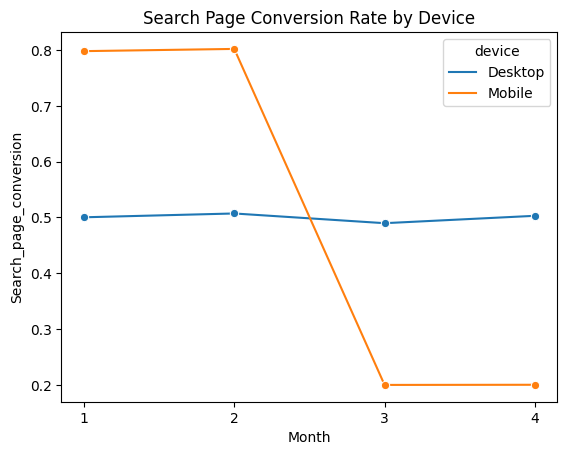

In [31]:
sns.lineplot(data=data, x="Month", y="page_search",hue='device',markers=True, ci=None, marker='o')
plt.title('Search Page Conversion Rate by Device')
plt.ylabel("Search_page_conversion")
plt.xticks(range(1, 5))

([<matplotlib.axis.XTick at 0x2a91f48b310>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

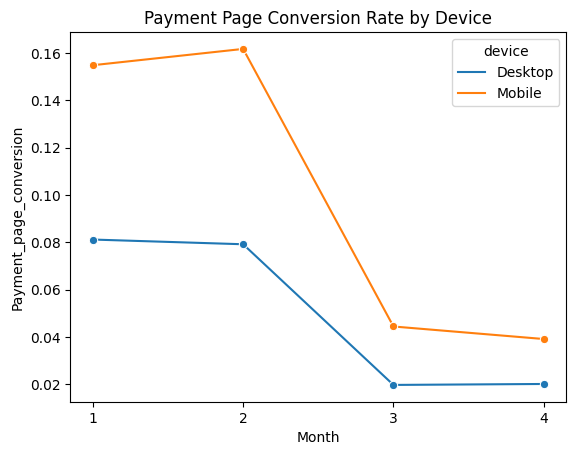

In [30]:
sns.lineplot(data=data, x="Month", y="page_payment",hue='device',markers=True, ci=None, marker='o')
plt.title('Payment Page Conversion Rate by Device')
plt.ylabel("Payment_page_conversion")
plt.xticks(range(1, 5))

([<matplotlib.axis.XTick at 0x2a91f4cf550>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

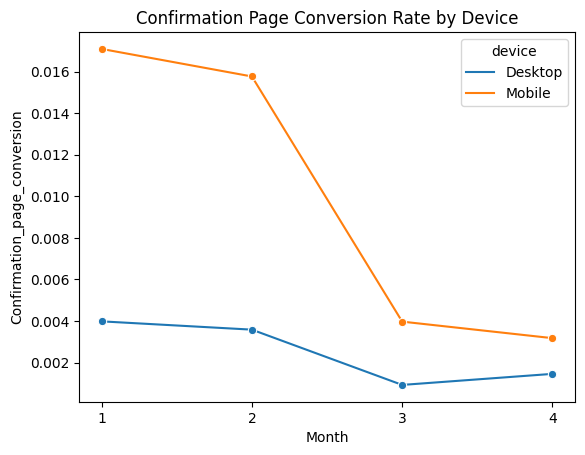

In [29]:
sns.lineplot(data=data, x="Month", y="page_confirmation",hue='device',markers=True, ci=None, marker='o')
plt.title('Confirmation Page Conversion Rate by Device')
plt.ylabel("Confirmation_page_conversion")
plt.xticks(range(1, 5))

Text(0, 0.5, 'Confirmation_page_conversion')

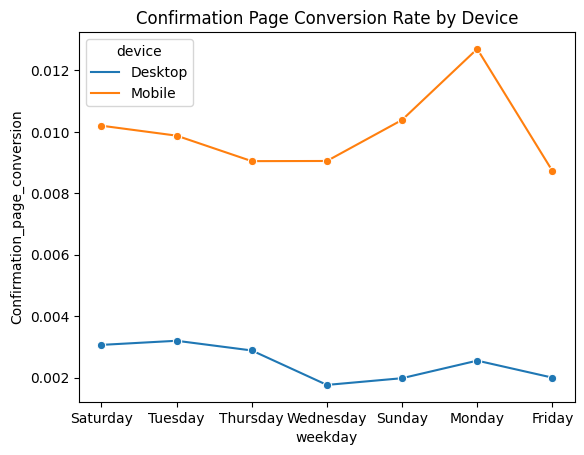

In [33]:
sns.lineplot(data=data, x="weekday", y="page_confirmation",hue='device',markers=True, ci=None, marker='o')
plt.title('Confirmation Page Conversion Rate by Device')
plt.ylabel("Confirmation_page_conversion")

#### Impact of Sex

In [37]:
Male_home=data[data['sex']=='Male']['page_home'].mean()
Female_home=data[data['sex']=='Female']['page_home'].mean()

Male_search=data[data['sex']=='Male']['page_search'].mean()
Female_search=data[data['sex']=='Female']['page_search'].mean()

Male_payment=data[data['sex']=='Male']['page_payment'].mean()
Female_payment=data[data['sex']=='Female']['page_payment'].mean()

Male_confirmation=data[data['sex']=='Male']['page_confirmation'].mean()
Female_confirmation=data[data['sex']=='Female']['page_confirmation'].mean()

In [39]:
sex = ['Male', 'Female']
home_page=[Male_home,Female_home]
search_page=[Male_search,Female_search]
payment_page=[Male_payment,Female_payment]
confirmation_page = [Male_confirmation,Female_confirmation]

conversion_rate = {'Home_page_Conversion':home_page,'Search_page_Conversion':search_page,'Payment_page_Conversion':payment_page,'Confirmation_page_Conversion': confirmation_page}
Funnel_Conversion = pd.DataFrame(conversion_rate, sex)
Funnel_Conversion

,Home_page_Conversion,Search_page_Conversion,Payment_page_Conversion,Confirmation_page_Conversion
Male,1.0,0.496944,0.064644,0.004655
Female,1.0,0.503073,0.068774,0.005347


In [79]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom", fontsize = 7.5)

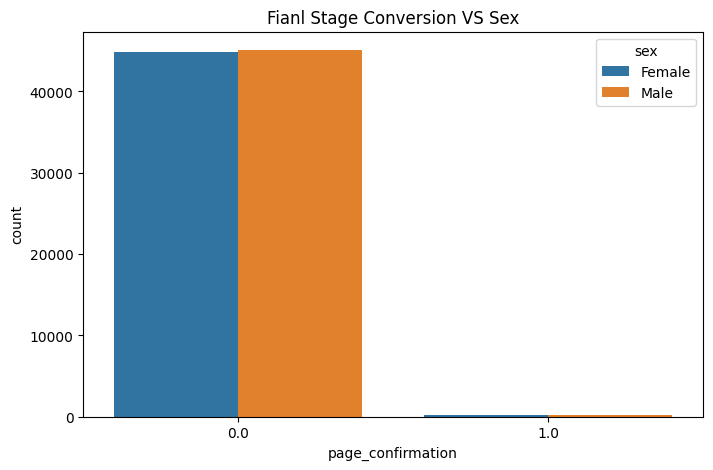

In [36]:
plt.figure(figsize=[8,5])
sns.countplot(x='page_confirmation',hue='sex',data=data)
plt.title('Fianl Stage Conversion VS Sex')
plt.show()

#### Statistical Test

In [45]:
df=data.drop(['user_id','page_home','page_search','page_payment'], axis=1)
df.head()

,device,sex,page_confirmation,Month,weekday
0,Desktop,Female,0.0,2,Saturday
1,Desktop,Male,0.0,1,Tuesday
2,Desktop,Male,0.0,4,Thursday
3,Desktop,Female,0.0,2,Wednesday
4,Desktop,Male,0.0,1,Thursday


In [46]:
df = pd.get_dummies(df,prefix='',prefix_sep='')
df.head()

,page_confirmation,Month,Desktop,Mobile,Female,Male,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0.0,2,1,0,1,0,0,0,1,0,0,0,0
1,0.0,1,1,0,0,1,0,0,0,0,0,1,0
2,0.0,4,1,0,0,1,0,0,0,0,1,0,0
3,0.0,2,1,0,1,0,0,0,0,0,0,0,1
4,0.0,1,1,0,0,1,0,0,0,0,1,0,0


In [47]:
X = df.drop('page_confirmation', axis = 1)
y = df['page_confirmation'] 

Chi-squared test (χ²) is a statistical test used to determine whether there is a significant association (or dependency) between two categorical variables. 
- It is a non-parametric test, which means that it makes no assumptions about the distribution of the data being analyzed. 
- The purpose of the chi-squared test is to determine if there is a difference between the expected frequencies and the observed frequencies in the data, and to quantify the magnitude of this difference.

The test works by comparing the observed frequencies of each category of the two variables with the expected frequencies, assuming that there is no association between them (i.e., they are independent). If the observed frequencies are significantly different from the expected frequencies, the test rejects the null hypothesis of independence and concludes that there is a significant association between the variables.

The chi-squared test can be used in a wide range of applications, such as:

Testing whether two variables are related in a survey or experiment
Investigating the association between two diseases
Analyzing the distribution of genetic traits in a population
Identifying factors that contribute to successful conversion

In [48]:
from sklearn.feature_selection import chi2

In [49]:
scores, pvalues = chi2(X,y)

In [50]:
pd.DataFrame({'chi2_score':scores,'chi2_pvalue':pvalues},index=X.columns).sort_values(by='chi2_score',ascending=False)

,chi2_score,chi2_pvalue
Mobile,151.758794,7.153913e-35
Desktop,76.131488,2.653915e-18
Month,69.232001,8.753616e-17
Monday,2.318821,1.278169e-01
Wednesday,1.615497,2.037208e-01
Friday,1.498670,2.208761e-01
Female,1.088708,2.967578e-01
Male,1.082703,2.980938e-01
Saturday,0.564341,4.525166e-01
Tuesday,0.481501,4.877434e-01


the score is used to evaluate the importance of each feature in the model. The higher the chi-square score of a feature, the more important it is considered to be for the classification task. A common significance level is 0.05, which means that there is a 5% chance of incorrectly rejecting the null hypothesis.

In [51]:
del X['Tuesday']# remove one redundant feature

In [52]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [57]:
dt = DecisionTreeClassifier(max_depth=3,min_samples_leaf=20,min_samples_split=20)
dt.fit(X,y)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, min_samples_split=20)

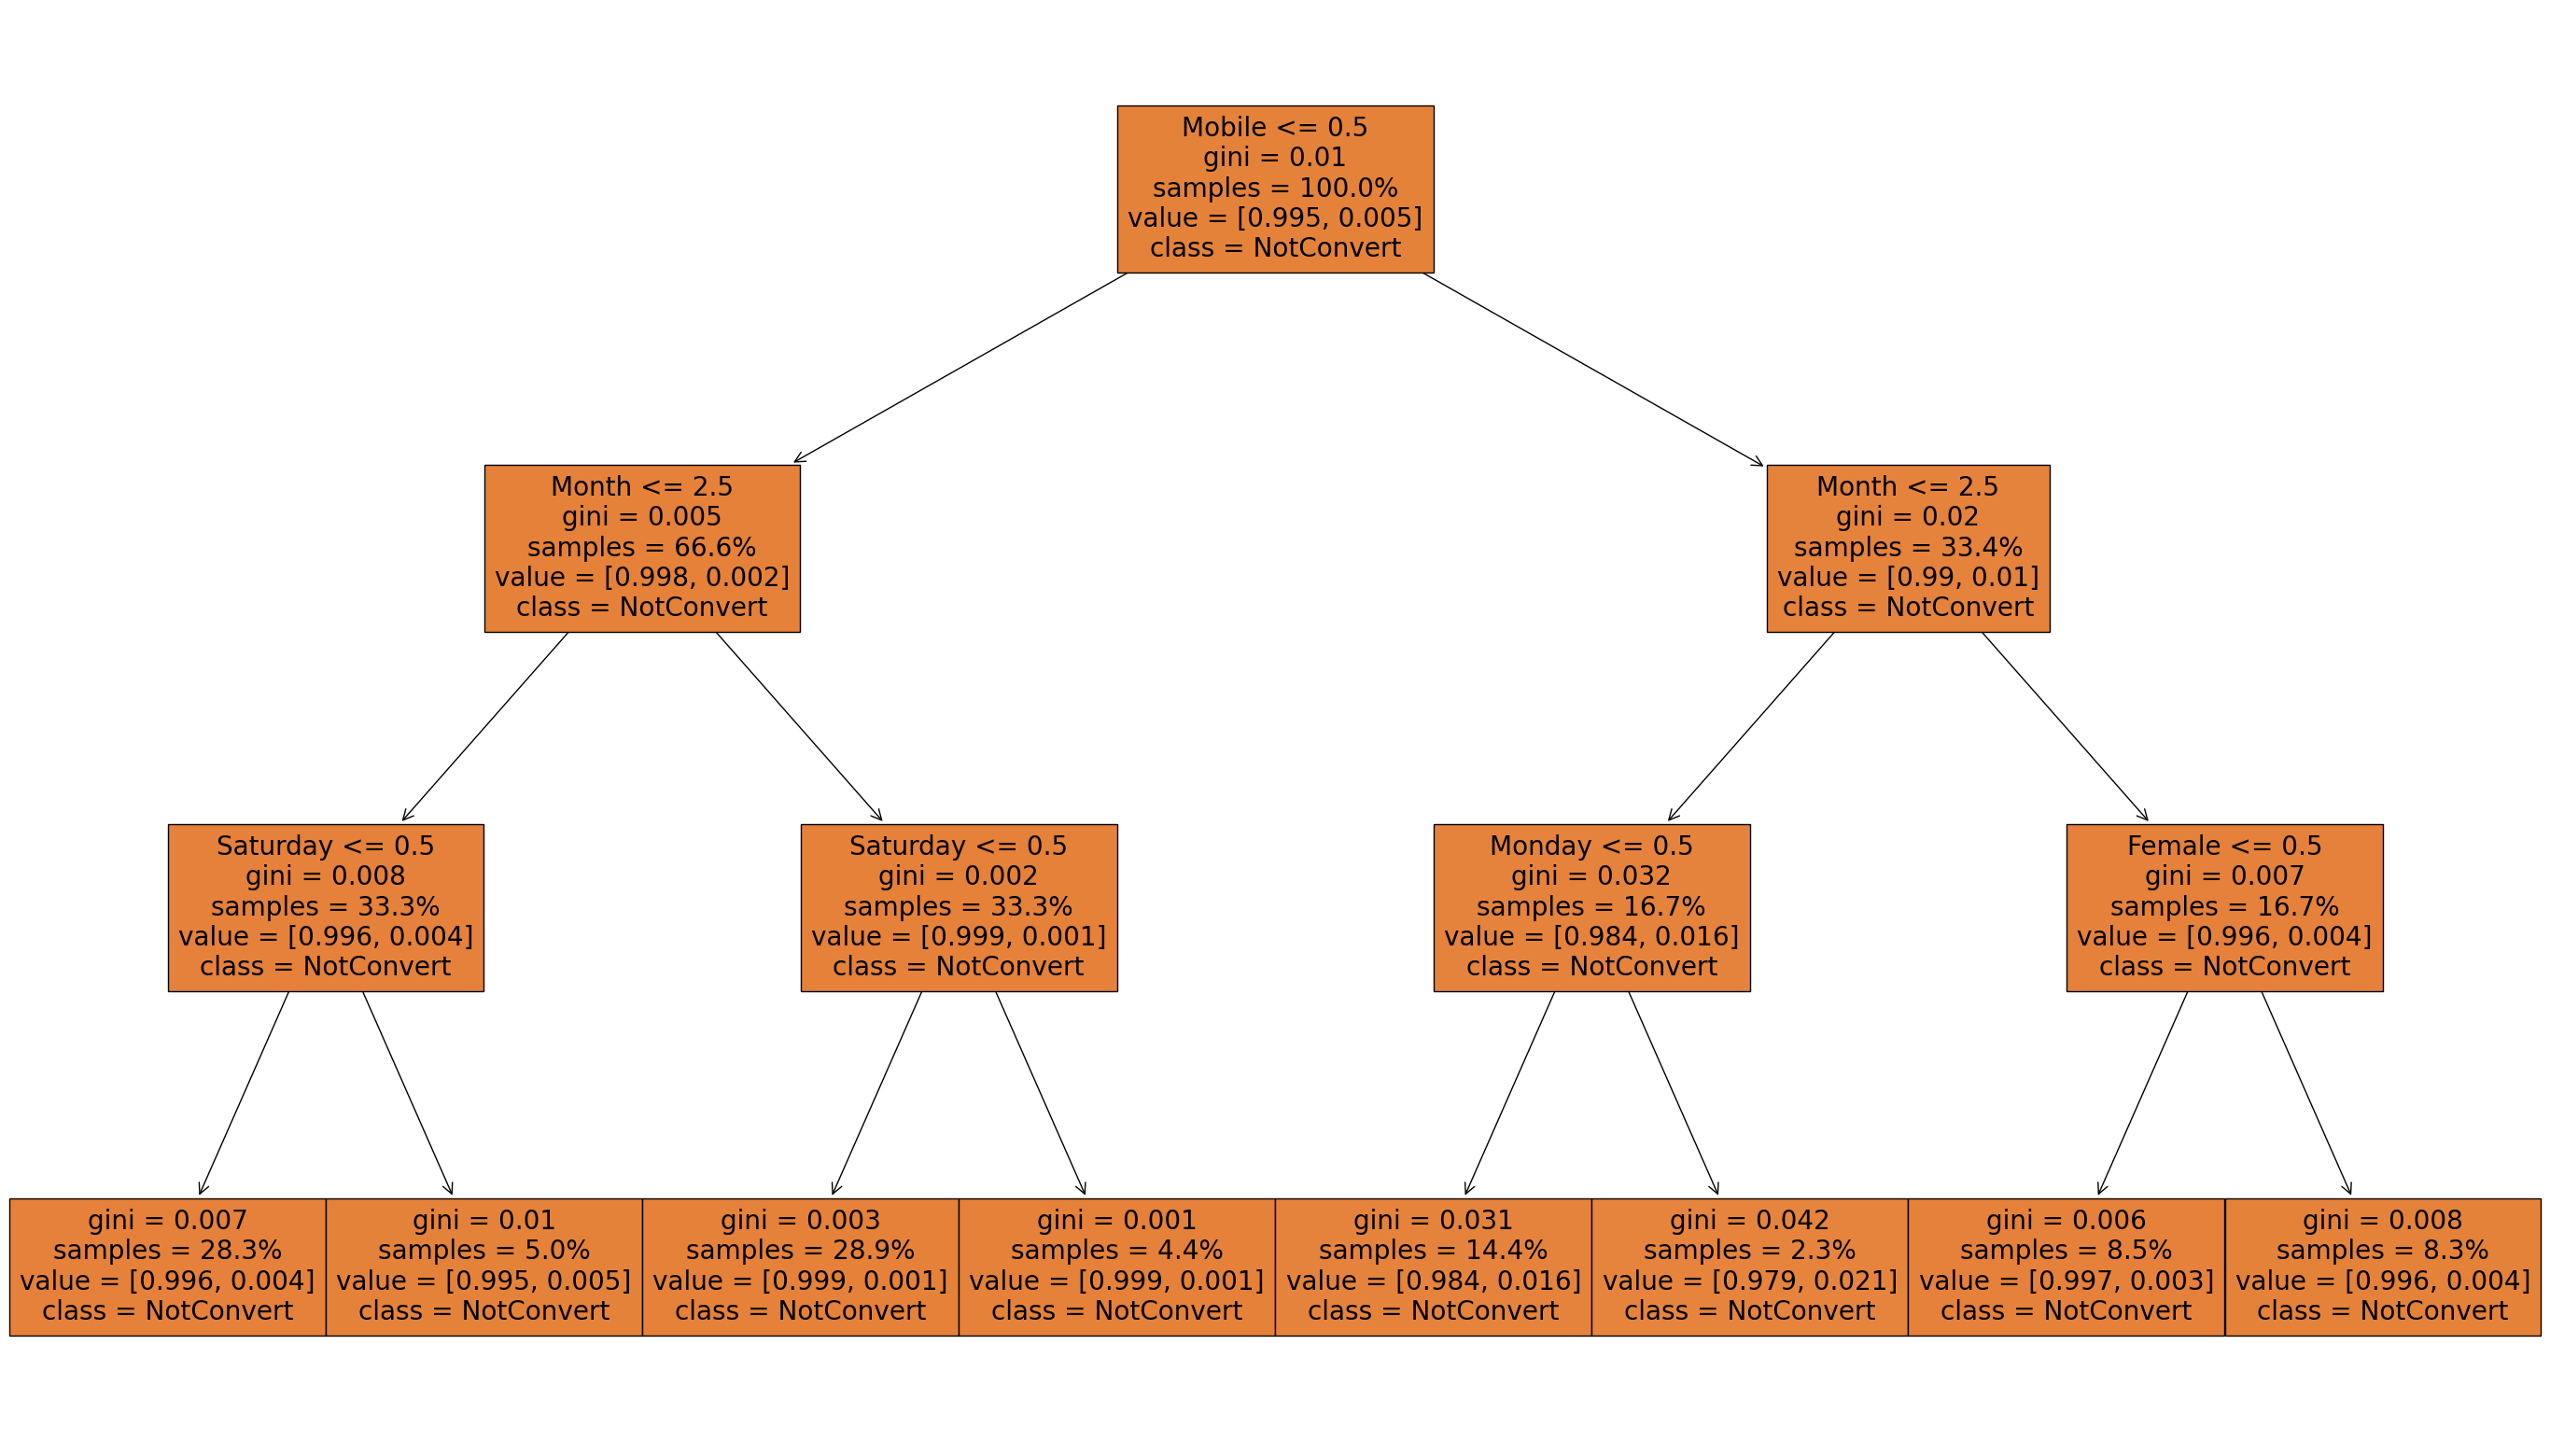

In [56]:
from sklearn import tree
fig = plt.figure(figsize=(35,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['NotConvert','Converted'],
                   proportion=True,filled=True)